In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from sktime.transformations.panel.shapelet_transform import (
    RandomShapeletTransform
)
from pathlib import  Path
from transphorm.framework_helpers.sk_helpers import *
import matplotlib.pyplot as plt
from transphorm.framework_helpers.comet_helpers import *
from sklearn.model_selection import train_test_split

In [16]:

MAIN_PATH = Path("/Users/mds8301/Desktop/temp")
# MAIN_PATH = Path(
# "/home/mds8301/Gaby_raw_data/processed_full_recording_unlabled_data"
# )  # quest
data_path = MAIN_PATH / "dopamine_full_timeseries_array.pt"

data = load_py_data_to_np(data_path)
X = data[:, 1:][:, ::200]
y = data[:, 0]
y = np.where(y==0, 2, y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)


In [78]:
X.shape[1]/1800 * 5

20.883333333333333

In [18]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_train = X_train.reshape(-1,1,  X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])


In [81]:
t = RandomShapeletTransform(
    n_shapelet_samples=1000, 
    max_shapelets=20,
    max_shapelet_length=20
)
t.fit(X_train, y_train)

RandomShapeletTransform(max_shapelet_length=20, max_shapelets=20,
                        n_shapelet_samples=1000)

In [82]:
shapelets = t.shapelets

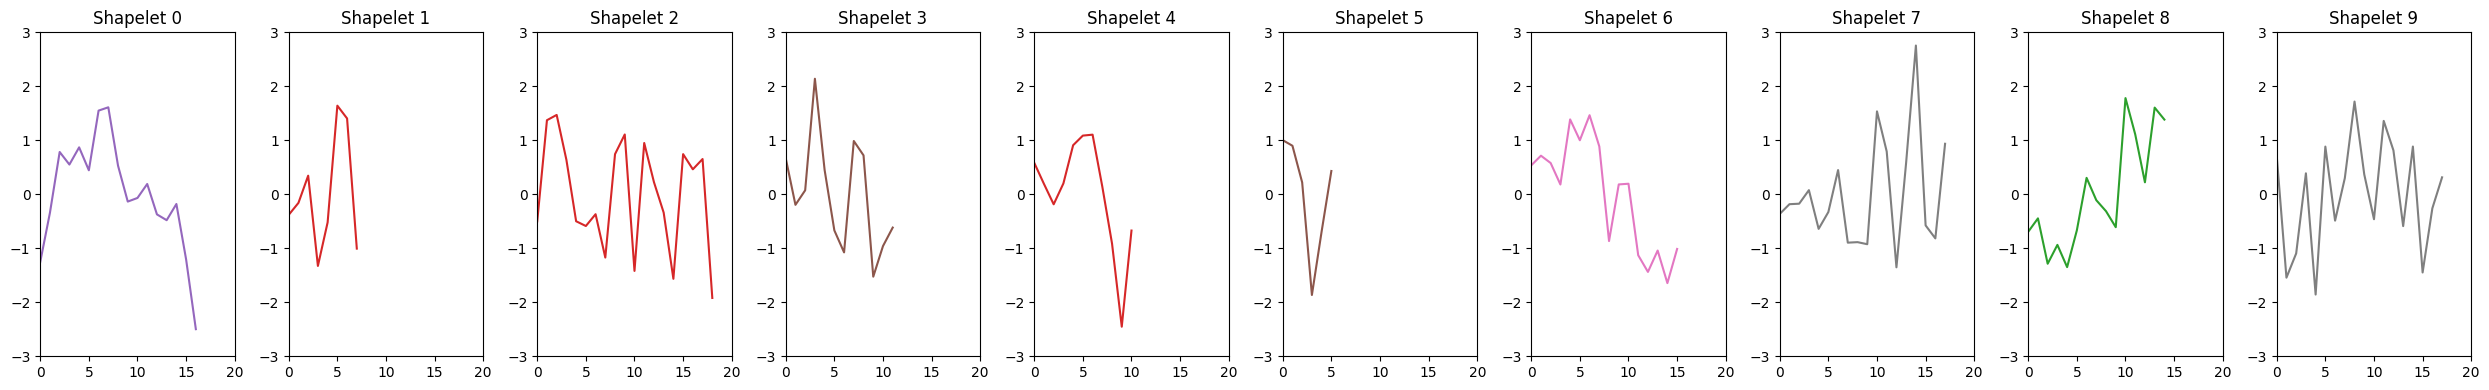

In [93]:
fig, ax = plt.subplots(ncols=10, sharex = True, figsize = (25, 4))
for i, shape in zip(range(len(shapelets)), shapelets):
    if i <10:
    #pick random color
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        random_color_idx = np.random.randint(0, len(colors))
        ax[i].plot(shape[-1], color = colors[random_color_idx])
        ax[i].set_title(f"Shapelet {i}")
        ax[i].set_ylim(-3, 3)
        ax[i].set_xlim(0, 20)
        plt.tight_layout()
        
